# IMPORT LIBRARY 

In [1]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt 

# MEMBACA GAMBAR DAN KONVERSI GAMBAR 

In [2]:
original_image = cv2.imread('Farah.jpg')
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# MENGUBAH GAMBAR KE GRAYCALE

In [3]:
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# MEDIAN FILTERING PADA SETIAP CHANNEL RGB

In [4]:
median_filtered_image = np.zeros_like(original_image_rgb)
for i in range(3):
    median_filtered_image[:, :, i] = cv2.medianBlur(original_image_rgb[:, :, i], 3)


# MEAN FILTERING MANUAL 

In [5]:
def mean_filter_manual(image, kernel_size=3):
    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode='constant', constant_values=0)
    mean_filtered_image = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size]
            mean_value = np.mean(neighborhood)
            mean_filtered_image[i, j] = mean_value
    
    return mean_filtered_image

mean_filtered_image_manual = mean_filter_manual(gray_image)

# PLOTTING GAMBAR

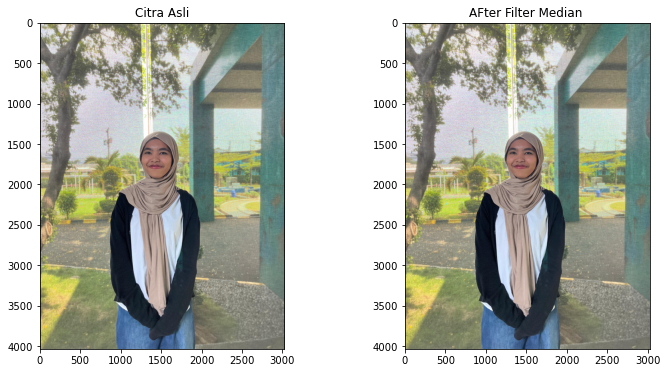

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax = axes.ravel()

ax[0].imshow(original_image_rgb)
ax[0].set_title('Citra Asli')
ax[0].axis('on')

ax[1].imshow(median_filtered_image)
ax[1].set_title('After Filter Median ')
ax[1].axis('on')

plt.show()

# PLOTTING GAMBAR GRAYSCALE DAN MEAN FILTERRED 

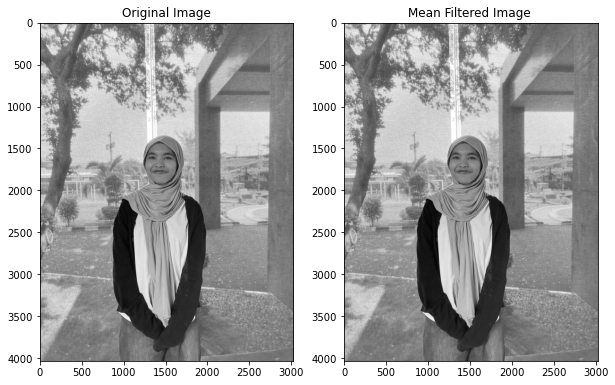

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('on')

ax[1].imshow(mean_filtered_image_manual, cmap='gray')
ax[1].set_title('Mean Filtered Image ')
ax[1].axis('on')
plt.show()


# PLOTTING EMPAT GAMBAR 

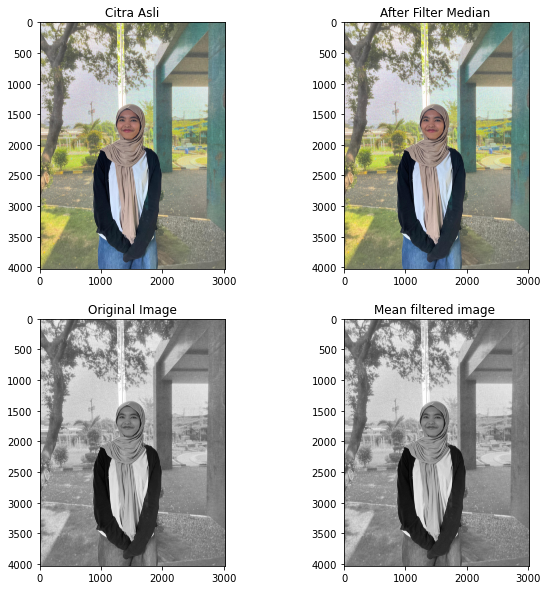

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(original_image_rgb)
axs[0, 0].set_title("Citra Asli")
axs[0, 0].axis('on')

axs[0, 1].imshow(median_filtered_image)
axs[0, 1].set_title("After Filter Median ")
axs[0, 1].axis('on')

axs[1, 0].imshow(gray_image, cmap='gray')
axs[1, 0].set_title("Original Image")
axs[1, 0].axis('on')

axs[1, 1].imshow(mean_filtered_image_manual, cmap='gray')
axs[1, 1].set_title("Mean filtered image ")
axs[1, 1].axis('on')

plt.show()